In [1]:
from plot_module import load_plot
import pandas as pd 

## Monthly Production and 12-Month Rolling Average

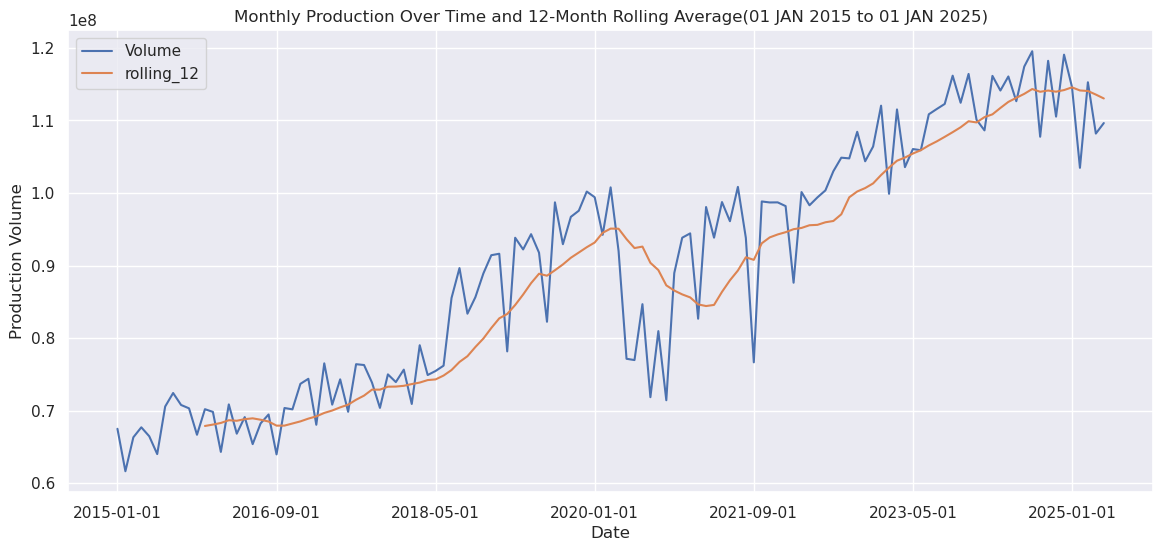

In [2]:
load_plot('Monthly production');

## Actual vs Predicted Plots

#### Naive Forecast

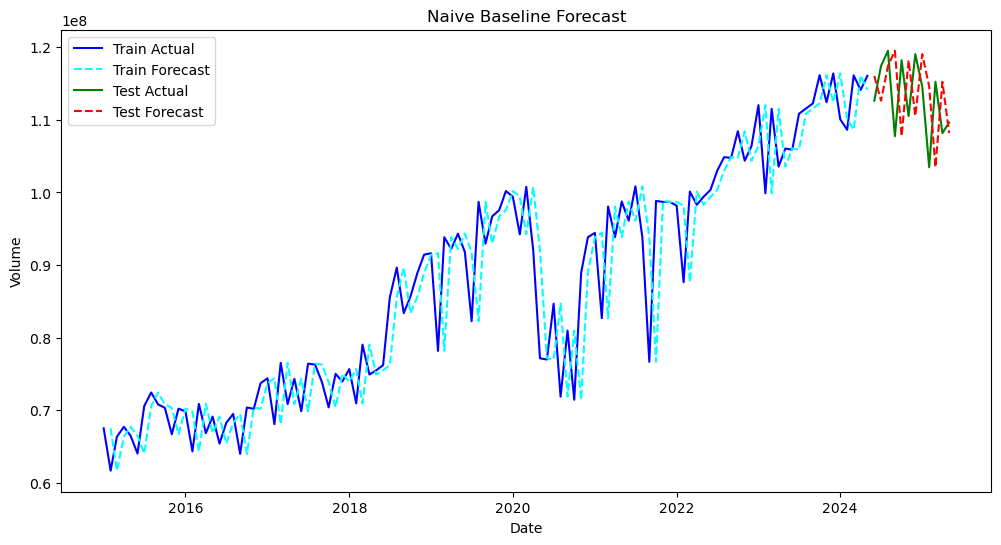

In [3]:
load_plot('Naive forecast');

#### EWMA 

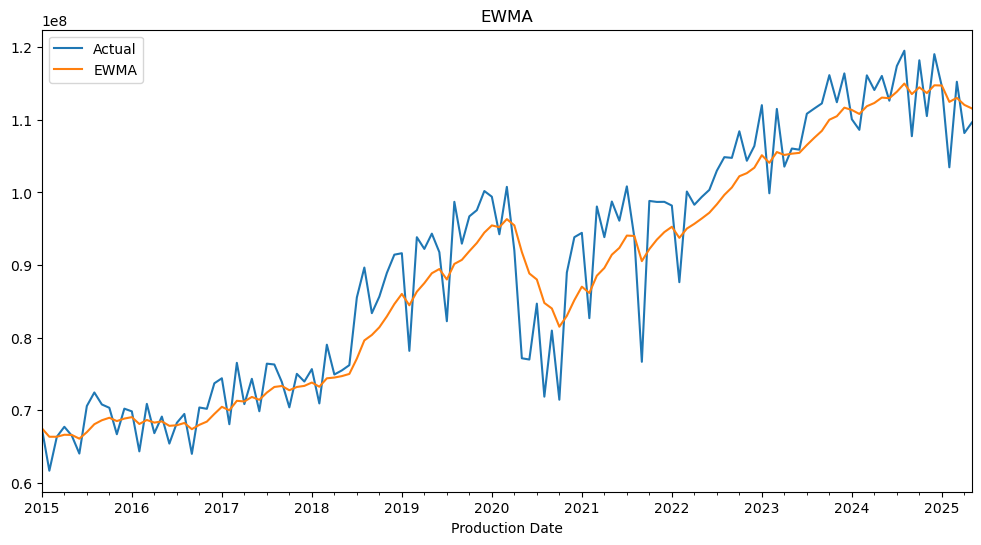

In [4]:
load_plot('EWMA');

#### SES 

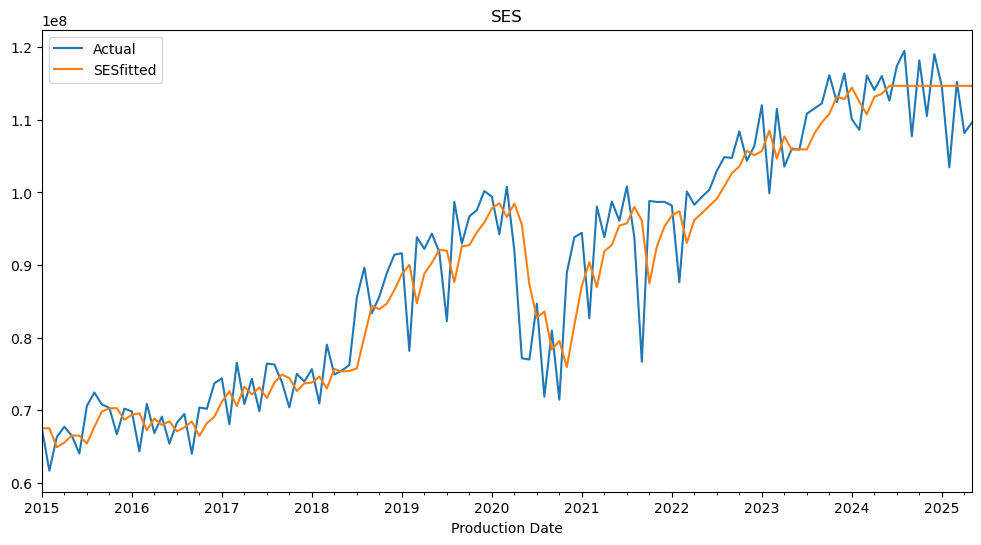

In [5]:
load_plot('SES');

#### Holt

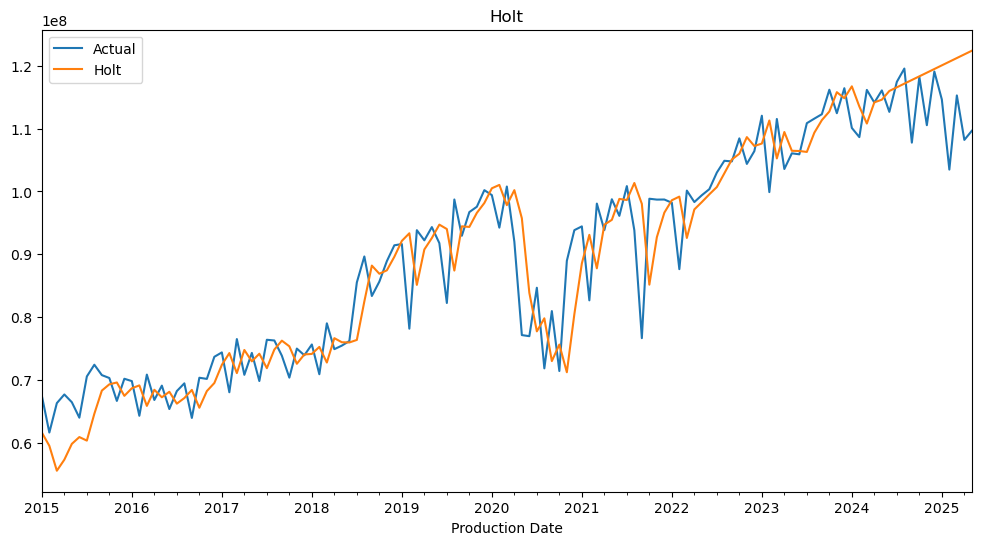

In [6]:
load_plot('Holt');

#### Holt-Winters(Additive Trend + Additive Seasonality)

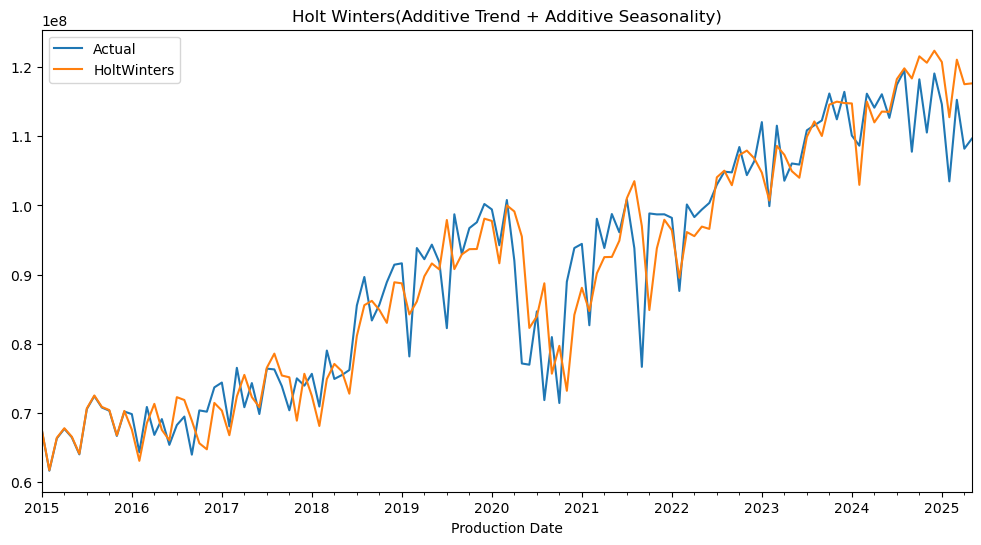

In [7]:
load_plot('hw_add');

#### Holt-Winters(Additive Trend + Multiplicative Seasonality) 

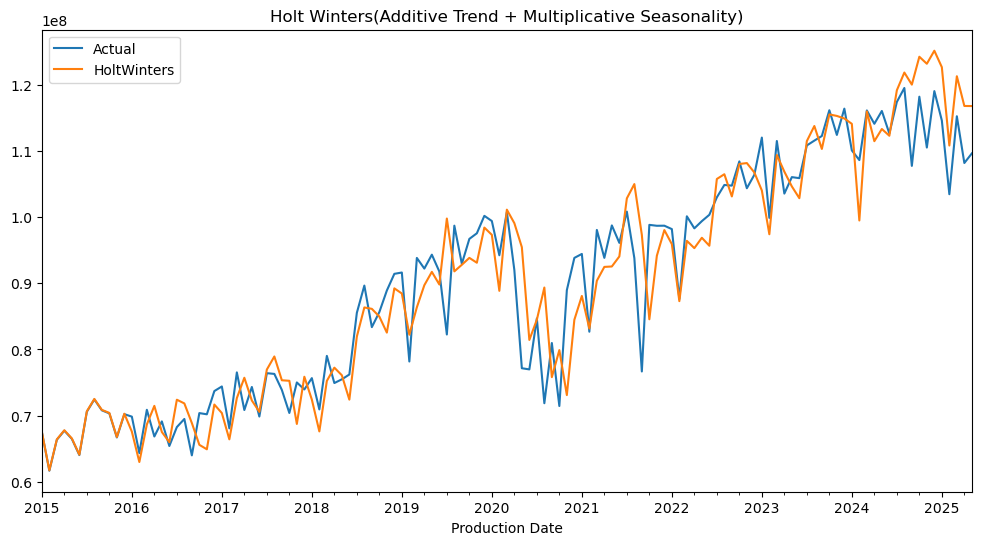

In [8]:
load_plot('hw_add_mul');

#### Holt-Winters(Multiplicative Trend + Multiplicative Seasonality)

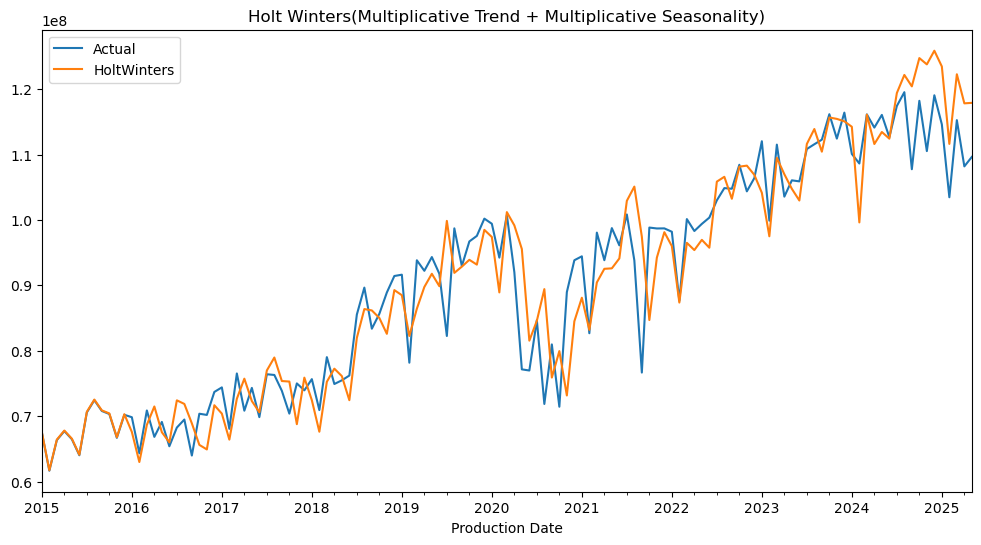

In [9]:
load_plot('hw_mul');

#### ARIMA (0,1,0)

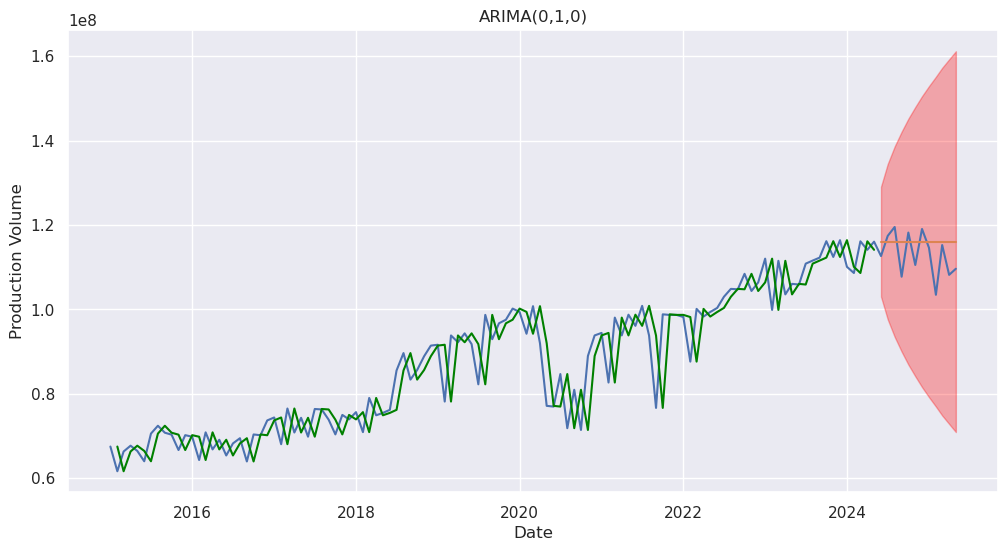

In [10]:
load_plot('ARIMA(0,1,0)');

#### ARIMA (1,1,0)

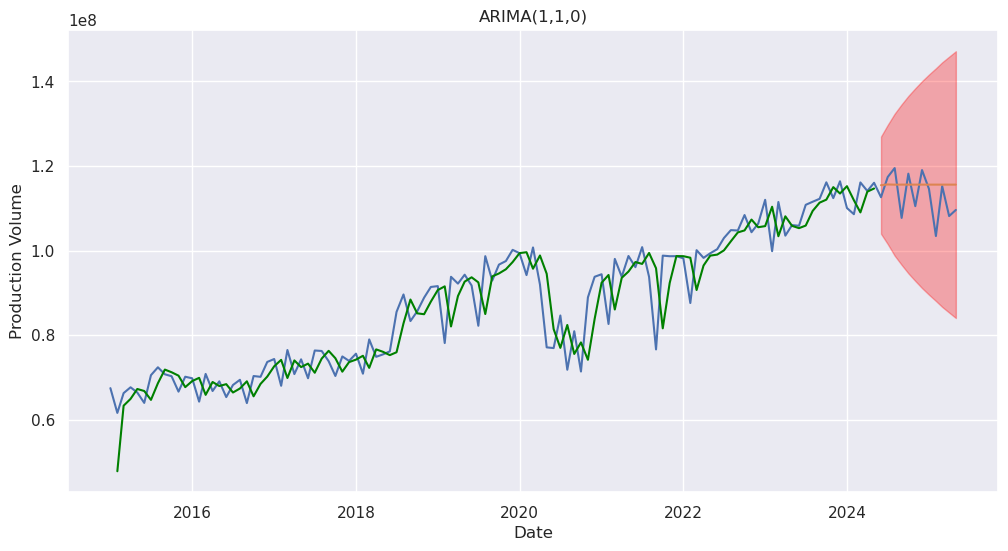

In [11]:
load_plot('ARIMA(1,1,0)');

#### SARIMA (0,1,1)(1,0,1,12)

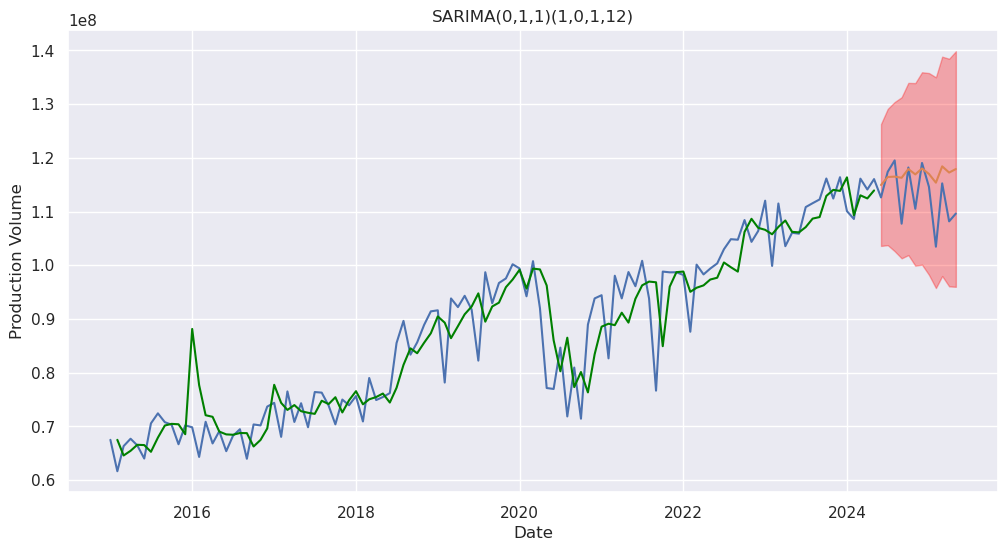

In [12]:
load_plot('SARIMA(0,1,1)(1,0,1,12)');

#### SARIMA (1,1,0)(2,0,0,12)

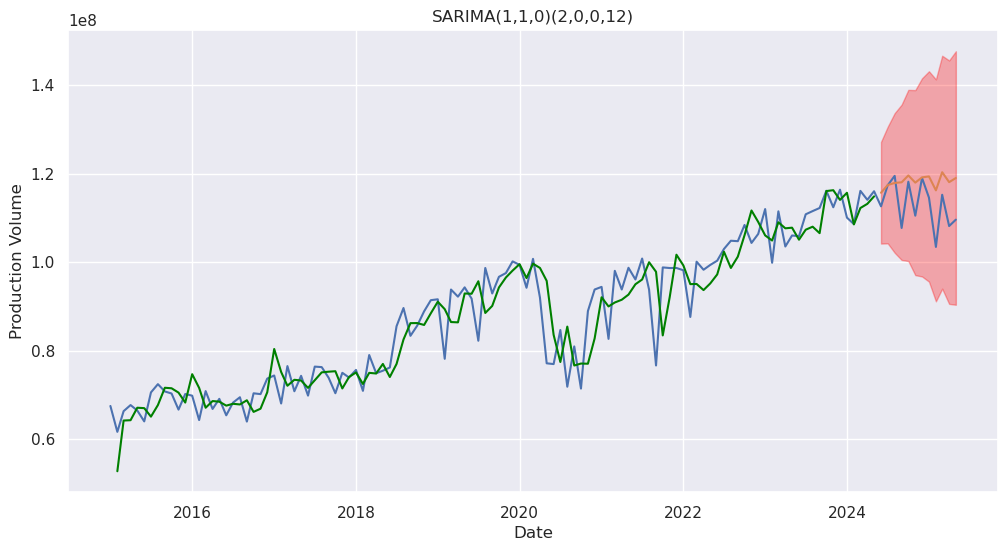

In [13]:
load_plot('SARIMA(1,1,0)(2,0,0,12)');

#### Linear Regression

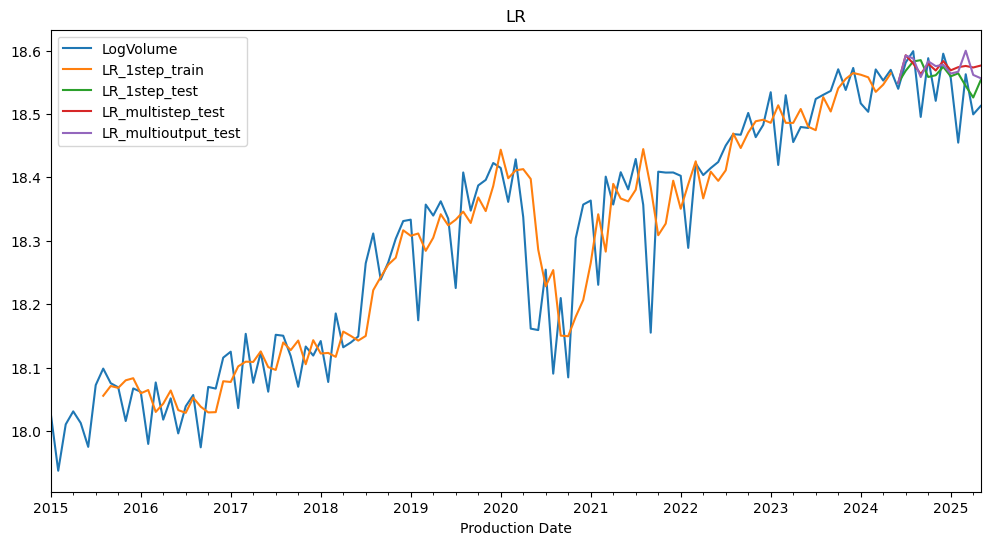

In [14]:
load_plot('LR');

#### SVR

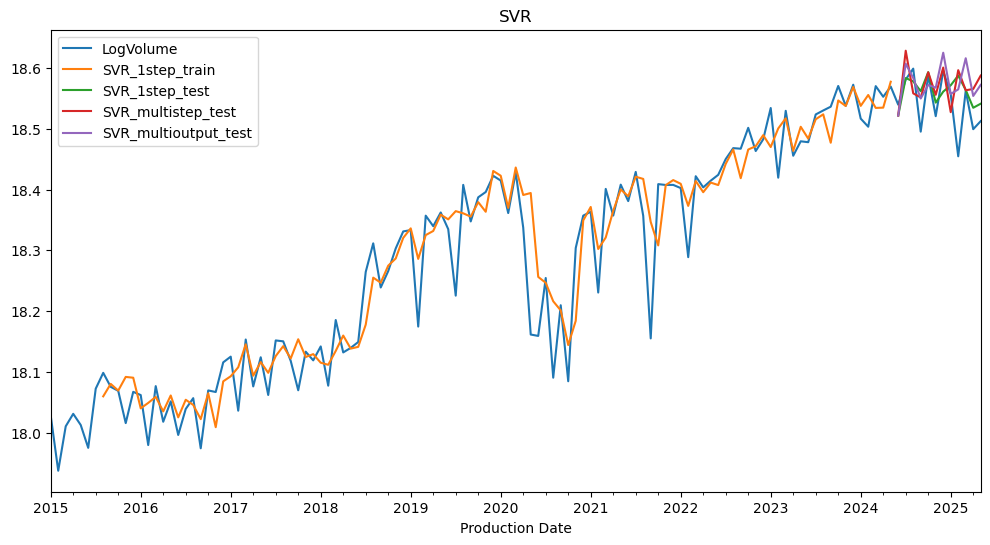

In [15]:
load_plot('SVR');

#### Random Forest Regression

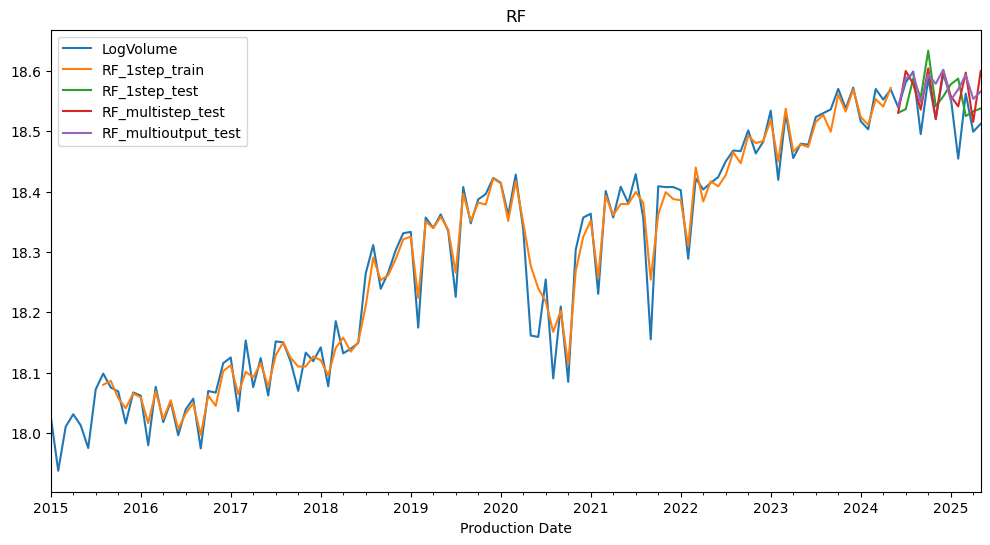

In [16]:
load_plot('RF');

#### LSTM

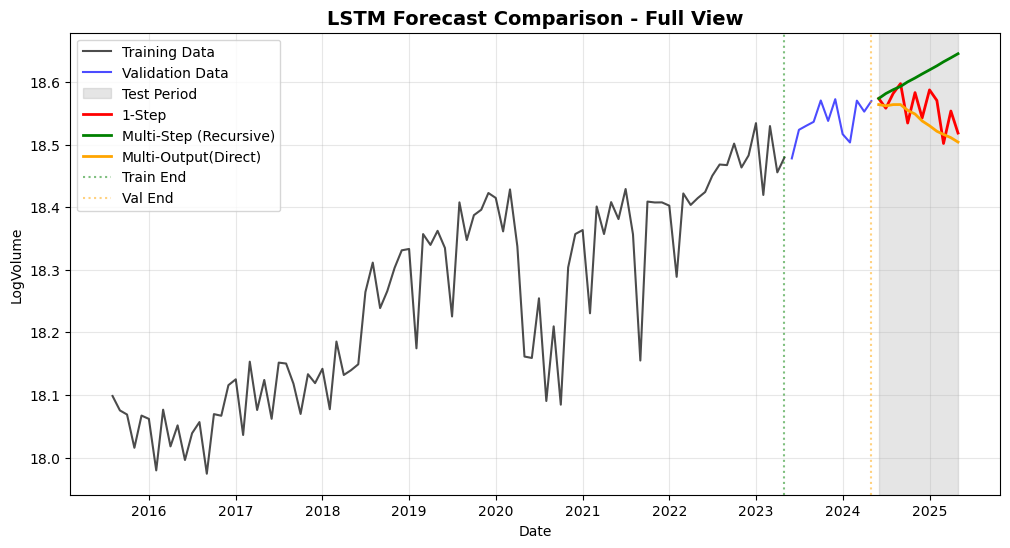

In [17]:
load_plot('LSTM');

### Model Comparison

In [18]:
# Metrics transferred from previous notebooks
df_baseline = pd.DataFrame({
    'Models': ['Naive Forecast', 'EWMA', 'SES', 'Holt', 'Holt-Winters(Additive)', 'Holt-Winters(Additive Trend + Multiplicative Seasonality)', 'Holt-Winters(Multiplicative)'],
    'RMSE': [7925857.24, 4224877.29, 5213051.49, 8624220.88, 6737046.93, 7501740.07, 8120349.21], 
    'MAE': [7054035.16, 3548693.13, 4335954.49, 6686203.89, 5643690.09, 6566245.66, 7167787.92],
    'R^2': [-1.57, 0.26, -0.11, -2.04, -0.85, -1.30, -1.70],
    'MAPE': [0.062, 0.031, 0.039, 0.061, 0.051, 0.058, 0.064]
})

df_arima = pd.DataFrame({
    'Models': ['ARIMA (0,1,0)', 'ARIMA (1,1,0)', 'SARIMA (0,1,1)(1,0,1,12)', 'SARIMA (1,1,0)(2,0,0,12)'],
    'MAE': [4696853.16, 4538933.012, 4785234.25, 5506255.85],
    'RMSE': [5795362.87, 5574067.28, 6053430.48, 6928738.44],
    'R2': [-0.37, -0.27, -0.50, -0.96],
    'MAPE':[0.042, 0.041, 0.043, 0.050],
})

df_ml_mae = pd.DataFrame({
    'Models': ['Linear Regression', 'SVR', 'Random Forest', 'LSTM'],
    'One-Step Test MAE': [0.034, 0.031, 0.039, 0.050],
    'Multi-Step Test MAE': [0.038, 0.043, 0.028, 0.069], 
    'Multi-Output Test MAE': [0.036, 0.040, 0.032, 0.035],
}) 

df_ml_rmse = pd.DataFrame({
    'Models': ['Linear Regression', 'SVR', 'Random Forest', 'LSTM'],
    'One-Step Test RMSE': [0.046, 0.047, 0.050, 0.0035],
    'Multi-Step Test RMSE': [0.051, 0.057, 0.040, 0.0078], 
    'Multi-Output Test RMSE': [0.047, 0.049, 0.046, 0.0016],
}) 

df_ml_mape = pd.DataFrame({
    'Models': ['Linear Regression', 'SVR', 'Random Forest', 'LSTM'],
    'One-Step Test MAPE': [0.0018, 0.0017, 0.0021, 0.0027],
    'Multi-Step Test MAPE': [0.0020, 0.0023, 0.0015, 0.0037], 
    'Multi-Output Test MAPE': [0.001952, 0.0021, 0.0017, 0.001916],
})

#### Baseline Models Comparison

In [19]:
df_baseline.style.highlight_max(color="lightcoral", axis=0)\
        .highlight_min(color="lightgreen", axis=0)

,Models,RMSE,MAE,R^2,MAPE
0,Naive Forecast,7925857.240000,7054035.160000,-1.570000,0.062000
1,EWMA,4224877.290000,3548693.130000,0.260000,0.031000
2,SES,5213051.490000,4335954.490000,-0.110000,0.039000
3,Holt,8624220.880000,6686203.890000,-2.040000,0.061000
4,Holt-Winters(Additive),6737046.930000,5643690.090000,-0.850000,0.051000
5,Holt-Winters(Additive Trend + Multiplicative Seasonality),7501740.070000,6566245.660000,-1.300000,0.058000
6,Holt-Winters(Multiplicative),8120349.210000,7167787.920000,-1.700000,0.064000


#### ARIMA Models Comparison

In [20]:
df_arima.style.highlight_max(color="lightcoral", axis=0)\
        .highlight_min(color="lightgreen", axis=0)

,Models,MAE,RMSE,R2,MAPE
0,"ARIMA (0,1,0)",4696853.160000,5795362.870000,-0.370000,0.042000
1,"ARIMA (1,1,0)",4538933.012000,5574067.280000,-0.270000,0.041000
2,"SARIMA (0,1,1)(1,0,1,12)",4785234.250000,6053430.480000,-0.500000,0.043000
3,"SARIMA (1,1,0)(2,0,0,12)",5506255.850000,6928738.440000,-0.960000,0.050000


#### Machine Learning Models Comparison

In [21]:
df_ml_mae.style.highlight_max(color="lightcoral", axis=0)\
        .highlight_min(color="lightgreen", axis=0)

,Models,One-Step Test MAE,Multi-Step Test MAE,Multi-Output Test MAE
0,Linear Regression,0.034000,0.038000,0.036000
1,SVR,0.031000,0.043000,0.040000
2,Random Forest,0.039000,0.028000,0.032000
3,LSTM,0.050000,0.069000,0.035000


In [22]:
df_ml_rmse.style.highlight_max(color="lightcoral", axis=0)\
        .highlight_min(color="lightgreen", axis=0)

,Models,One-Step Test RMSE,Multi-Step Test RMSE,Multi-Output Test RMSE
0,Linear Regression,0.046000,0.051000,0.047000
1,SVR,0.047000,0.057000,0.049000
2,Random Forest,0.050000,0.040000,0.046000
3,LSTM,0.003500,0.007800,0.001600


In [23]:
df_ml_mape.style.highlight_max(color="lightcoral", axis=0)\
        .highlight_min(color="lightgreen", axis=0)

,Models,One-Step Test MAPE,Multi-Step Test MAPE,Multi-Output Test MAPE
0,Linear Regression,0.001800,0.002000,0.001952
1,SVR,0.001700,0.002300,0.002100
2,Random Forest,0.002100,0.001500,0.001700
3,LSTM,0.002700,0.003700,0.001916


### Results Conclusions

1. Among traditional baseline methods, EWMA provides the strongest generalization performance, while Holt–Winters variants exhibit overfitting and poor out-of-sample behavior.
2. ARIMA and SARIMA models fail to generalize adequately, suggesting that linear autoregressive structures are insufficient to capture the dynamics of the series.
3. For one-step-ahead prediction, classical ML models (particularly SVR) outperform LSTM in terms of absolute accuracy, while LSTM excels at minimizing large errors.
4. Recursive multi-step forecasting significantly degrades LSTM performance due to error accumulation, whereas Random Forest models exhibit superior robustness for longer horizons.
5. Direct multi-output forecasting substantially improves LSTM performance, making it competitive or superior to traditional ML models for fixed-horizon prediction.

### 24-Month LSTM Forecast

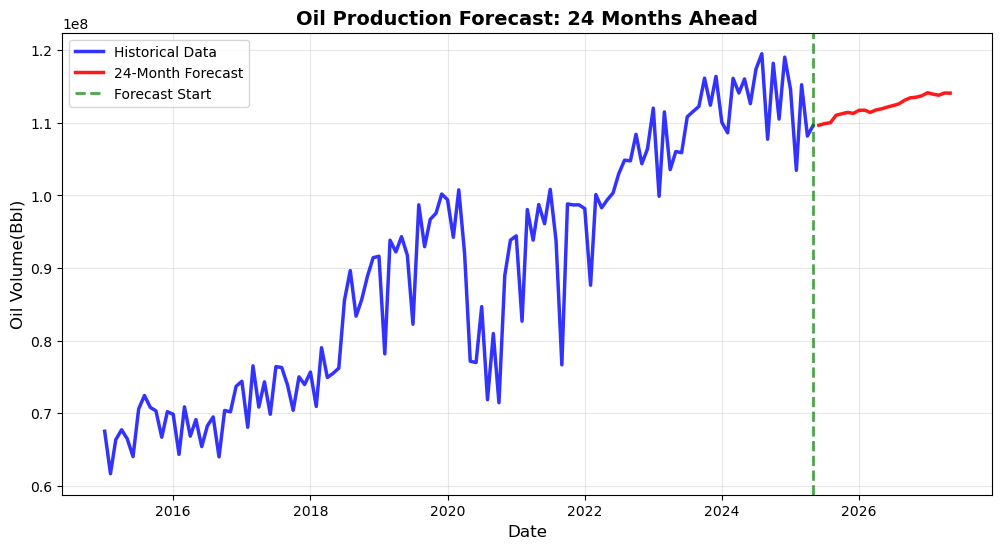

In [24]:
load_plot('LSTM forecast');

A multi-output LSTM was selected for the final 24-month production forecast because it directly learns the relationship between historical production patterns and the entire future horizon at once
Unlike recursive forecasting, this approach avoids error accumulation across steps and produces more stable long-term forecasts

The model captures temporal dependence, seasonality, and nonlinear dynamics present in oil and gas production data, outperforming baseline statistical and classical machine learning models on out-of-sample metrics 
As the forecast horizon extends, uncertainty increases, reinforcing the importance of periodic model updates as new data becomes available

Overall, the multi-output LSTM provides a robust, realistic, and decision-oriented forecast, suitable for medium-term production planning rather than point-precision prediction